$$\textbf{Transmission spectrum at O K-edge for cycled MXene}$$

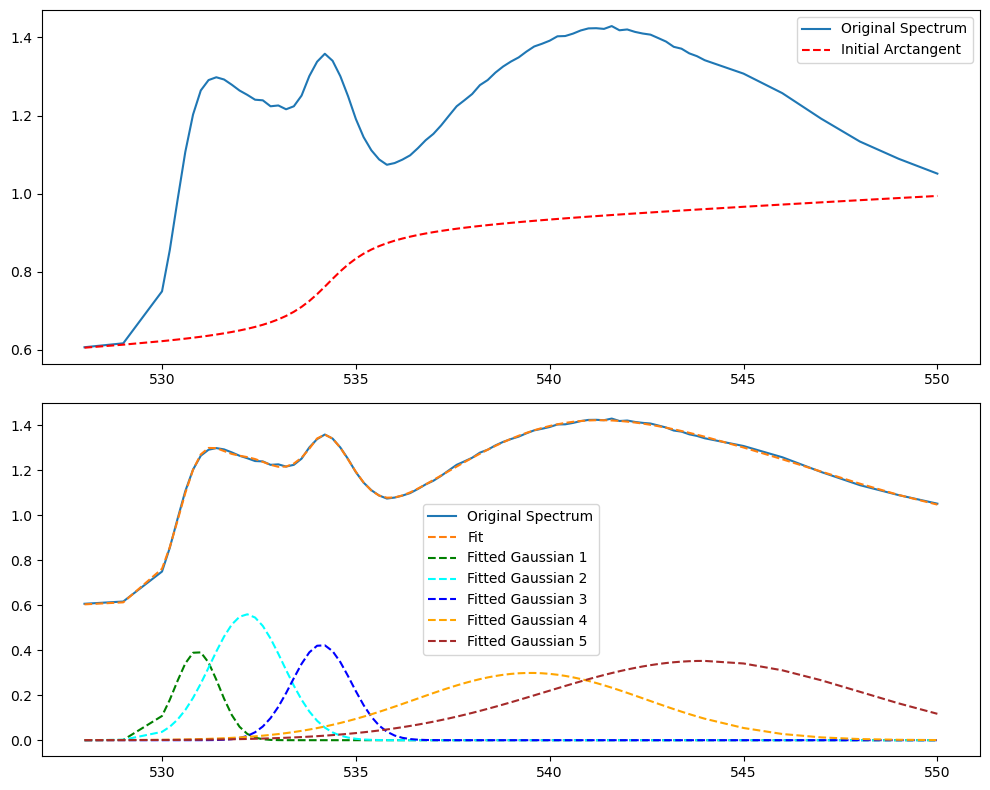

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit.models import Model

# Define arctangent (step function) and Gaussian functions
def arctangent_step(x, step_height, step_center, step_width, linear_slope):
    arctan_part = step_height * (np.arctan((x - step_center) / step_width) / np.pi + 0.5)
    linear_part = linear_slope * (x - np.max(x))
    return 0.7 + (arctan_part + linear_part)

def gaussian_peak(x, amplitude, center, sigma):
    return amplitude * np.exp(-(x - center)**2 / (2 * sigma**2))

# Combine arctangent and Gaussian functions into a composite model with four peaks
# Combine arctangent and Gaussian functions into a composite model with four peaks
def composite_model(x, step_height, step_center, step_width, linear_slope,
                    gauss1_amplitude, gauss1_center, gauss1_sigma, gauss1_width,
                    gauss2_amplitude, gauss2_center, gauss2_sigma, gauss2_width,
                    gauss3_amplitude, gauss3_center, gauss3_sigma, gauss3_width,
                    gauss4_amplitude, gauss4_center, gauss4_sigma, gauss4_width,
                    gauss5_amplitude, gauss5_center, gauss5_sigma, gauss5_width):
    return (arctangent_step(x, step_height, step_center, step_width, linear_slope) +
            np.abs(gaussian_peak(x, gauss1_amplitude, gauss1_center, gauss1_width * gauss1_sigma)) +
            np.abs(gaussian_peak(x, gauss2_amplitude, gauss2_center, gauss2_width * gauss2_sigma)) +
            np.abs(gaussian_peak(x, gauss3_amplitude, gauss3_center, gauss3_width * gauss3_sigma)) +
            np.abs(gaussian_peak(x, gauss4_amplitude, gauss4_center, gauss4_width * gauss4_sigma))+
            np.abs(gaussian_peak(x, gauss5_amplitude, gauss5_center, gauss5_width * gauss5_sigma)))


# Function to fit the spectrum with the composite model
def fit_spectrum(x, y, step_height, step_center, step_width, linear_slope,
                 gauss1_amplitude, gauss1_center, gauss1_sigma, gauss1_width,
                 gauss2_amplitude, gauss2_center, gauss2_sigma, gauss2_width,
                 gauss3_amplitude, gauss3_center, gauss3_sigma, gauss3_width,
                 gauss4_amplitude, gauss4_center, gauss4_sigma, gauss4_width,
                 gauss5_amplitude, gauss5_center, gauss5_sigma, gauss5_width):
    model = Model(composite_model)
    params = model.make_params(step_height=step_height, step_center=step_center, step_width=step_width,
                               linear_slope=linear_slope,
                               gauss1_amplitude=gauss1_amplitude, gauss1_center=gauss1_center,
                               gauss1_sigma=gauss1_sigma, gauss1_width=gauss1_width,
                               gauss2_amplitude=gauss2_amplitude, gauss2_center=gauss2_center,
                               gauss2_sigma=gauss2_sigma, gauss2_width=gauss2_width,
                               gauss3_amplitude=gauss3_amplitude, gauss3_center=gauss3_center,
                               gauss3_sigma=gauss3_sigma, gauss3_width=gauss3_width,
                               gauss4_amplitude=gauss4_amplitude, gauss4_center=gauss4_center,
                               gauss4_sigma=gauss4_sigma, gauss4_width=gauss4_width,
                               gauss5_amplitude=gauss5_amplitude, gauss5_center=gauss5_center,
                               gauss5_sigma=gauss5_sigma, gauss5_width=gauss5_width)

    result = model.fit(y, params, x=x)

    return result

#here put your NEXAFS spectrum to be fitted
energy = energy
intensity = d1

# Initial guess for parameters
initial_step_height = 0.3
initial_step_center = 534.3
initial_step_width = 1
initial_linear_slope = 0.005

initial_gauss1_amplitude = 0.2
initial_gauss1_center = 531.4
initial_gauss1_sigma = 1
initial_gauss1_width = 1  

initial_gauss2_amplitude = 0.1
initial_gauss2_center = 533.6
initial_gauss2_sigma = 1
initial_gauss2_width = 1  

initial_gauss3_amplitude = 0.4
initial_gauss3_center = 534.2
initial_gauss3_sigma = 1
initial_gauss3_width = 1  

initial_gauss4_amplitude = 0.35
initial_gauss4_center = 539.8
initial_gauss4_sigma = 1
initial_gauss4_width = 1  

initial_gauss5_amplitude = 0.29#0.25
initial_gauss5_center = 542.5
initial_gauss5_sigma = 1
initial_gauss5_width = 1  

# Fit the spectrum
result = fit_spectrum(energy, intensity, initial_step_height, initial_step_center, initial_step_width,
                      initial_linear_slope,
                      initial_gauss1_amplitude, initial_gauss1_center, initial_gauss1_sigma, initial_gauss1_width,
                      initial_gauss2_amplitude, initial_gauss2_center, initial_gauss2_sigma, initial_gauss2_width,
                      initial_gauss3_amplitude, initial_gauss3_center, initial_gauss3_sigma, initial_gauss3_width,
                      initial_gauss4_amplitude, initial_gauss4_center, initial_gauss4_sigma, initial_gauss4_width,
                      initial_gauss5_amplitude, initial_gauss5_center, initial_gauss5_sigma, initial_gauss5_width)

# Plot the original spectrum, arctangent, and the fitted Gaussian peaks
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(energy, intensity, label='Original Spectrum')
plt.plot(energy, arctangent_step(energy, initial_step_height, initial_step_center, initial_step_width, initial_linear_slope),
         label='Initial Arctangent', linestyle='--', color='red')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(energy, intensity, label='Original Spectrum')
plt.plot(energy, result.best_fit, label='Fit', linestyle='--')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss1_amplitude'].value,
         result.params['gauss1_center'].value, result.params['gauss1_width'].value * result.params['gauss1_sigma'].value)),
         label='Fitted Gaussian 1', linestyle='--', color='green')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss2_amplitude'].value,
         result.params['gauss2_center'].value, result.params['gauss2_width'].value * result.params['gauss2_sigma'].value)),
         label='Fitted Gaussian 2', linestyle='--', color='cyan')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss3_amplitude'].value,
         result.params['gauss3_center'].value, result.params['gauss3_width'].value * result.params['gauss3_sigma'].value)),
         label='Fitted Gaussian 3', linestyle='--', color='blue')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss4_amplitude'].value,
         result.params['gauss4_center'].value, result.params['gauss4_width'].value * result.params['gauss4_sigma'].value)),
         label='Fitted Gaussian 4', linestyle='--', color='orange')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss5_amplitude'].value,
         result.params['gauss5_center'].value, result.params['gauss5_width'].value * result.params['gauss5_sigma'].value)),
         label='Fitted Gaussian 5', linestyle='--', color='brown')
plt.legend()

plt.tight_layout()
plt.show()

# Display the fit parameters
#print(result.fit_report())
